In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Input, BatchNormalization, MaxPooling2D,Flatten, Dense, Dropout, AveragePooling2D
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

from utils import *
import numpy as np


In [5]:
# Data Path
with_mask_paths = ["./data/data2/with_mask/with_mask_" + str(i) + ".jpg" for i in range(1, 4500 + 1)]
without_mask_paths = ["./data/data2/without_mask/without_mask_" + str(i) + ".jpg" for i in range(1, 4500 + 1)]


In [6]:
# Declare array for storing data & corresponding label
data = []
label = []

# Load with_mask data
load_data_with_label(path_arr=with_mask_paths,
                     data_arr=data,
                     label_arr=label,
                     img_size=(224, 224, 3),
                     _label = 1)


In [7]:

# Load without_mask data
load_data_with_label(path_arr=without_mask_paths,
                     data_arr=data,
                     label_arr=label,
                     img_size=(224, 224, 3),
                     _label = 0)

print("Data Load Done!")

Data Load Done!


In [8]:

# Convert to numpy array
data = np.array(data, dtype="float32")
label = np.array(label)

# Label one-hot encoding
_lb = LabelBinarizer()

label = _lb.fit_transform(label)
label = to_categorical(label)

In [9]:

# Split data to train data and test data
(train_X, test_X, train_Y, test_Y) = train_test_split(data, label,
                                                      test_size=0.2,
                                                      stratify=label,
                                                      random_state=777,
                                                      shuffle=True)


In [10]:

# Make CNN Model
CNN = Sequential([
    Input(shape=(224, 224, 3)),
    BatchNormalization(),
    Conv2D(32, (3, 3), padding='SAME', activation='relu',
           kernel_regularizer=l2(5e-4)),
    Conv2D(32, (3, 3), padding='SAME', activation='relu',
           kernel_regularizer=l2(5e-4)),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), padding='SAME', activation='relu',
           kernel_regularizer=l2(5e-4)),
    Conv2D(64, (3,3), padding='SAME', activation='relu',
           kernel_regularizer=l2(5e-4)),
    MaxPooling2D((2,2)),

    Conv2D(128, (3,3), padding='SAME', activation='relu',
           kernel_regularizer=l2(5e-4)),
    Conv2D(128, (3,3), padding='SAME', activation='relu',
           kernel_regularizer=l2(5e-4)),
    Conv2D(128, (3,3), padding='SAME', activation='relu',
           kernel_regularizer=l2(5e-4)),
    MaxPooling2D((2,2)),

    Conv2D(256, (1, 1), activation='relu'),
    Dropout(0.5),
    Conv2D(128, (1,1), activation='relu'),
    AveragePooling2D(pool_size=(3, 3)),

    Flatten(),
    Dropout(0.5),
    Dense(2, activation='softmax')

])

In [11]:
# Declare epoch, batch size, optimizer
epochs = 10
batch_size = 100
optimizer = Adam(learning_rate=1e-4, decay = 1e-4/epochs)



In [12]:
# Compile and training
CNN.compile(loss = "binary_crossentropy", optimizer = optimizer, metrics=['accuracy'])

history = CNN.fit(train_X, train_Y,
                    batch_size=batch_size,
                    validation_split=0.1,
                    epochs = epochs)

# Model save
CNN.save("./checkpoint")

Train on 6480 samples, validate on 720 samples
Epoch 1/10
6480/6480 [==============================] - 30s 5ms/sample - loss: 0.6506 - accuracy: 0.8316 - val_loss: 0.4103 - val_accuracy: 0.9333

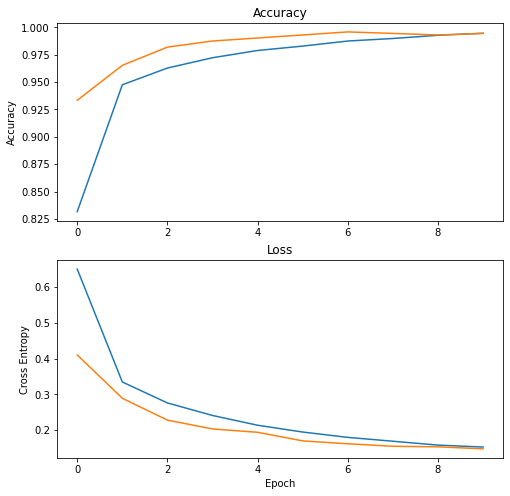

1800/1800 [==============================] - 3s 1ms/sample - loss: 0.1632 - accuracy: 0.9911

In [13]:
# Draw Plot and Save
training_log_plot(history)

# Evaluate
CNN.evaluate(test_X, test_Y)

export_model_summary(CNN)